<a href="https://colab.research.google.com/github/Motrik/Stock-Price-Prediction/blob/master/Homework2_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import Huber
from keras.optimizers import SGD

A importar directamente da minha Dropbox.

In [65]:
!wget -O TeslaStockHistory.csv https://www.dropbox.com/s/tl8cjvwf23ne257/TeslaStockHistory.csv?dl=0

--2019-09-08 17:51:44--  https://www.dropbox.com/s/tl8cjvwf23ne257/TeslaStockHistory.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tl8cjvwf23ne257/TeslaStockHistory.csv [following]
--2019-09-08 17:51:44--  https://www.dropbox.com/s/raw/tl8cjvwf23ne257/TeslaStockHistory.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc054c805e2f95bcc5220bb4442e.dl.dropboxusercontent.com/cd/0/inline/AoKNTXFqxirQQOYVSL_GcHxutwJh8zjyKkmCYoZRpc5Te-k6yyEzBHleRNQhplj5_T3TFohwCwmBjgMcUkxFRja7QvX8mSh2RWL8FbN6bZfhOpdZBiwuwfCP6S4UWunfbAM/file# [following]
--2019-09-08 17:51:44--  https://uc054c805e2f95bcc5220bb4442e.dl.dropboxusercontent.com/cd/0/inline/AoKNTXFqxirQQOYVSL_GcHxutwJh8zjyKkmCYoZRpc5Te-k6yyEzBHleRNQhplj5_T3TFohwCwmBjgMcUk

In [66]:
df = pd.read_csv('TeslaStockHistory.csv')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,273.260010,286.029999,271.000000,285.500000,285.500000,14283500
2018-09-11,279.470001,282.000000,273.549988,279.440002,279.440002,9170000
2018-09-12,281.440002,292.500000,278.649994,290.540009,290.540009,10015400
2018-09-13,288.019989,295.000000,285.179993,289.459991,289.459991,6340300
2018-09-14,288.760010,297.329987,286.519989,295.200012,295.200012,6765600


In [0]:
window_size = 32 # Numero de dias de amostragem no passado. (Amostras de 32 dias)

# indices das janelas de 32 dias - para prever em grupos de 32 dias e adivinhar o preço do 33º
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

data = df['Adj Close'].values[indices] # Matriz 2d das amostras
X = data[:,:-1] # Cada coluna da matriz2D é um dos 32 dias
y = data[:,-1] # Cada valor desta matriz é do 33º dia ???

#80% são os valores para treinar e os outros 20% serão para testar a performance no final !!!
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]



#1 Ridge Regression

In [0]:
# Fit model on train data (80%)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Infer on test data (20%)
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

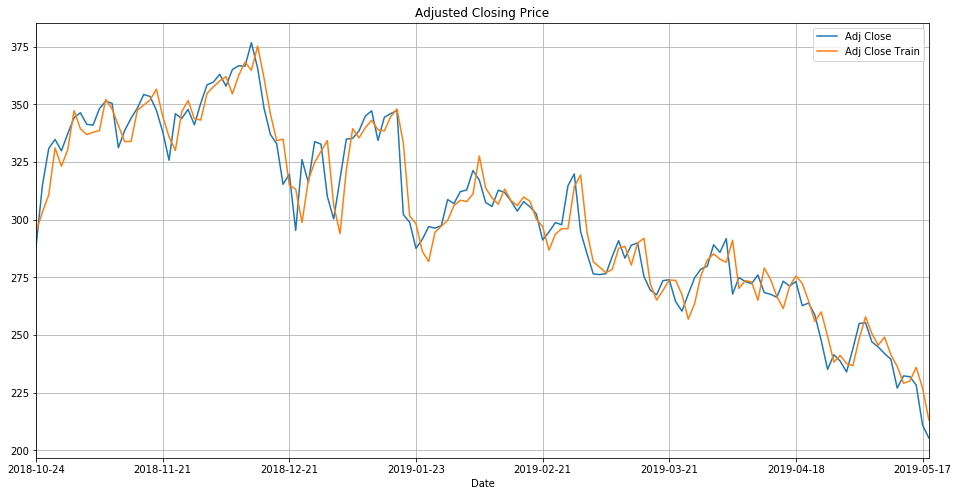

In [69]:
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split] # ultimos 32 dias que ainda nao sabemos - para testar o modelo
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

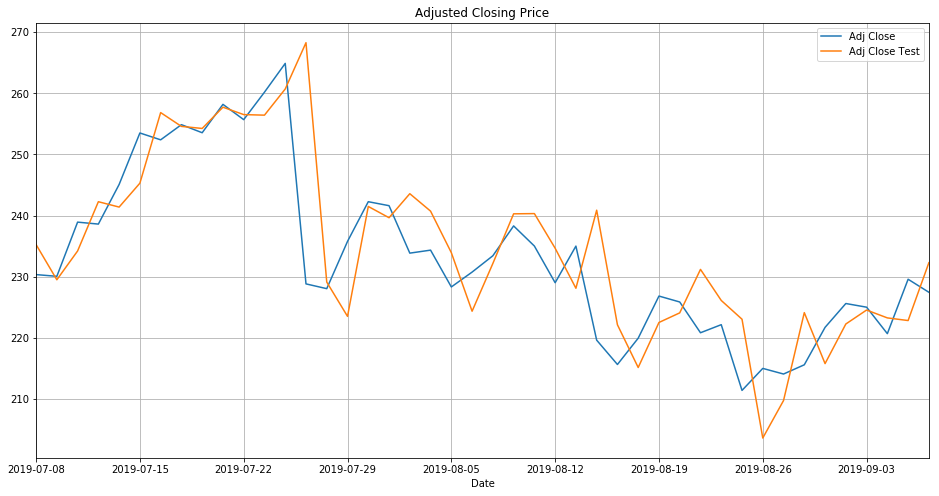

In [70]:
# Testar o modelo nos 20% de amostragem para teste
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:] # os ultimos 32 dias
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

#2 Lasso Regression

In [0]:
from sklearn import linear_model

# Fit model on train data (80%)
lasso_model = linear_model.Lasso(alpha=0.2)
lasso_model.fit(X_train, y_train)

# Infer on test data (20%)
y_pred_train_lasso = lasso_model.predict(X_train)
y_test_lasso = lasso_model.predict(X_test)

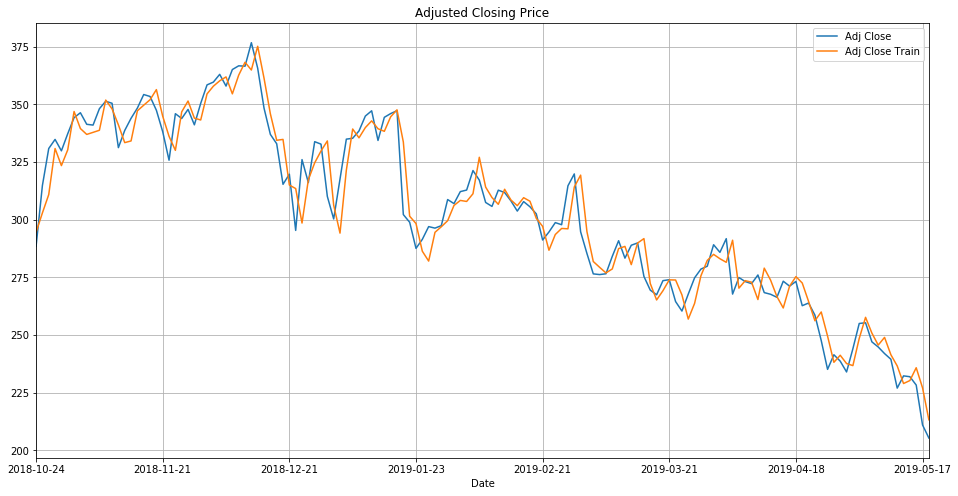

In [72]:
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:ind_split] # ultimos 32 dias que ainda nao sabemos - para testar o modelo
df_lasso['Adj Close Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

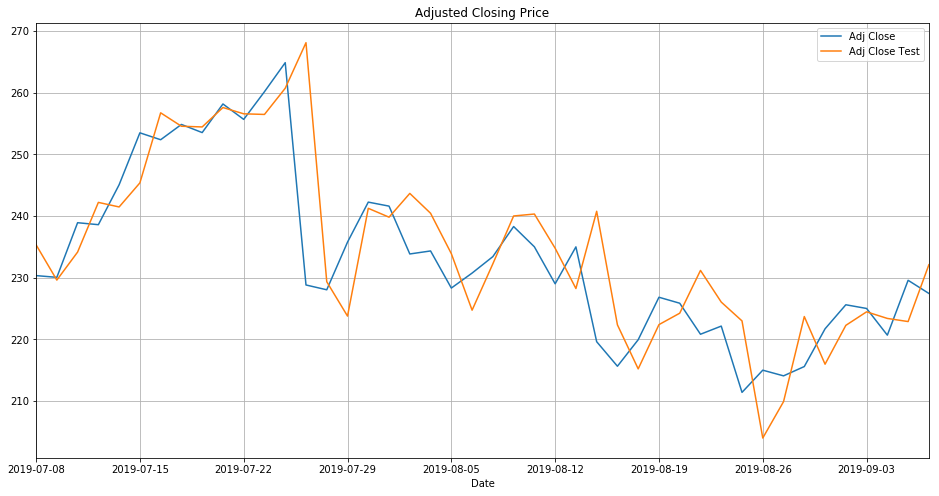

In [73]:
# Testar o modelo nos 20% de amostragem para teste
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[ind_split+window_size:] # os ultimos 32 dias
df_lasso['Adj Close Test'] = y_test_lasso
df_lasso.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

#2 Least Angle Regression LARS Regression

In [0]:
from sklearn import linear_model #ESTÁ REPETIDO

# Fit model on train data (80%)
lars_model = linear_model.LassoLars(alpha=.1)
lars_model.fit(X_train, y_train)

# Infer on test data (20%)
y_pred_train_lars = lars_model.predict(X_train)
y_test_lars = lars_model.predict(X_test)

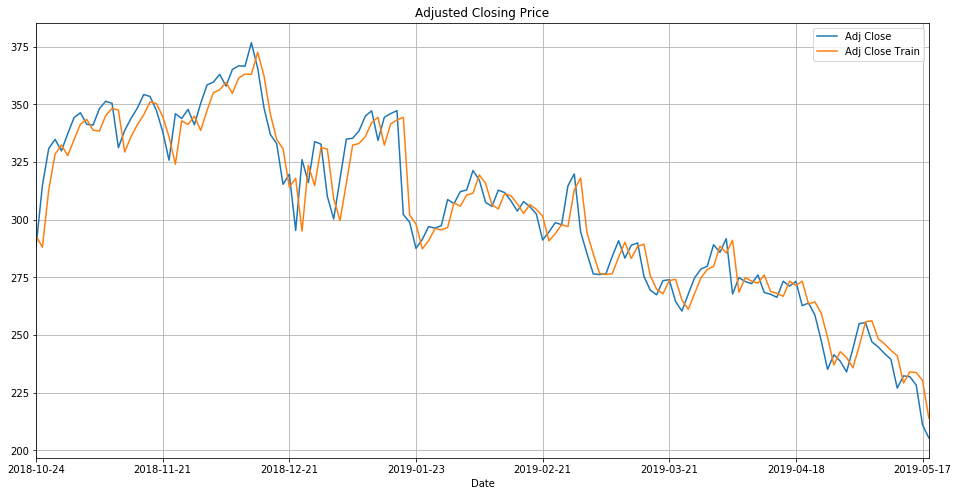

In [75]:
df_lars = df.copy()
df_lars.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lars = df_lars.iloc[window_size:ind_split] # ultimos 32 dias que ainda nao sabemos - para testar o modelo
df_lars['Adj Close Train'] = y_pred_train_lars[:-window_size]
df_lars.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

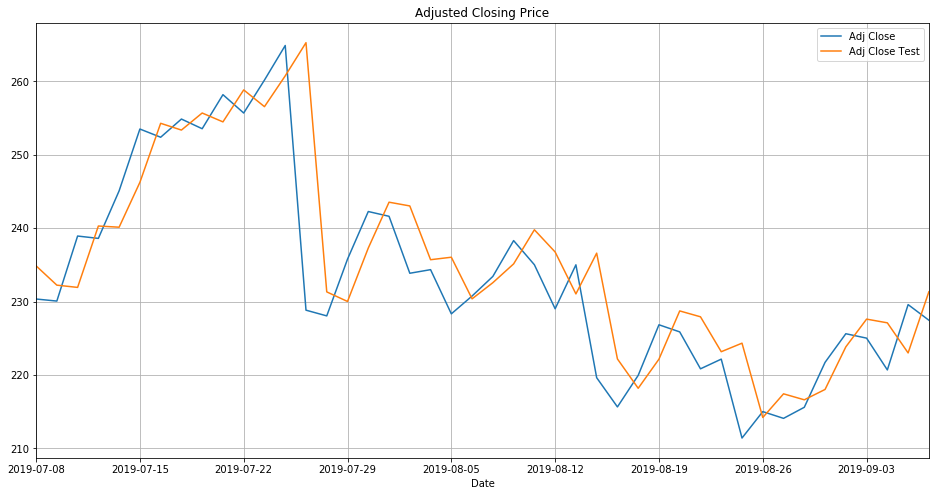

In [76]:
# Testar o modelo nos 20% de amostragem para teste
df_lars = df.copy()
df_lars.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lars = df_lars.iloc[ind_split+window_size:] # os ultimos 32 dias
df_lars['Adj Close Test'] = y_test_lars
df_lars.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Comparison of 3 regression **models**

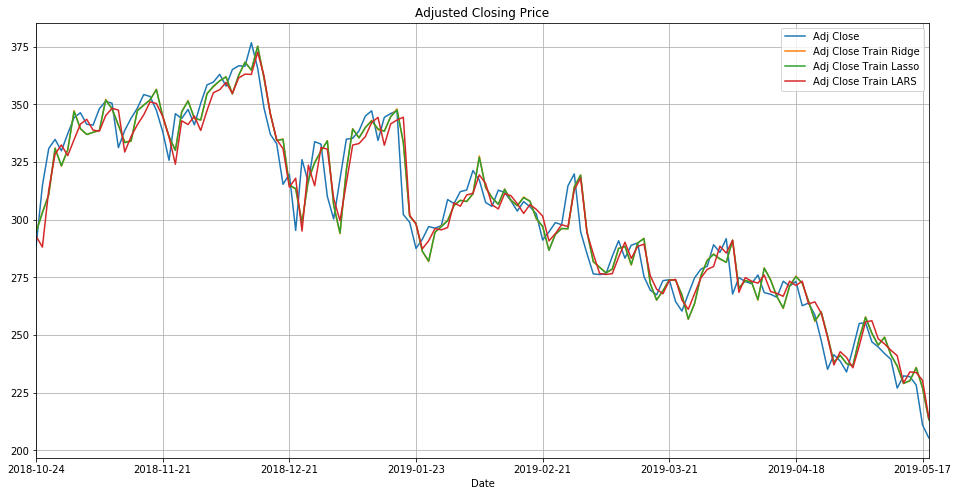

In [77]:
df_train = df.copy()
df_train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_train = df_train.iloc[window_size:ind_split] # Past 32 days we don't know yet

df_train['Adj Close Train Ridge'] = y_pred_train_ridge[:-window_size]
df_train['Adj Close Train Lasso'] = y_pred_train_lasso[:-window_size]
df_train['Adj Close Train LARS'] = y_pred_train_lars[:-window_size]
# Plot the data now
df_train.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

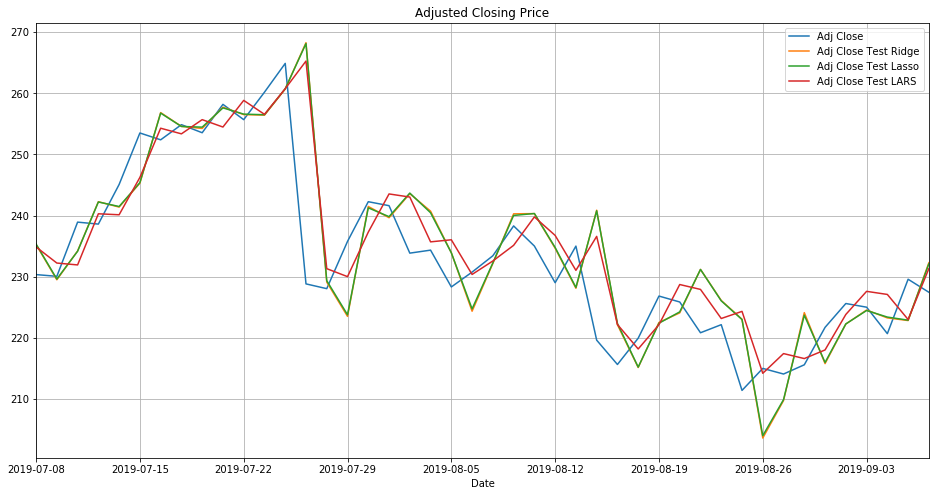

In [78]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[ind_split+window_size:] # Past 32 days we don't know yet
# Add in all of our methods
df_test['Adj Close Test Ridge'] = y_pred_ridge
df_test['Adj Close Test Lasso'] = y_pred_lasso
df_test['Adj Close Test LARS'] = y_test_lars
# Plot the data now
df_test.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)


# Predict next 5 days - and let's make some money AHAHAHAH

Going to use the LARS Regression Model

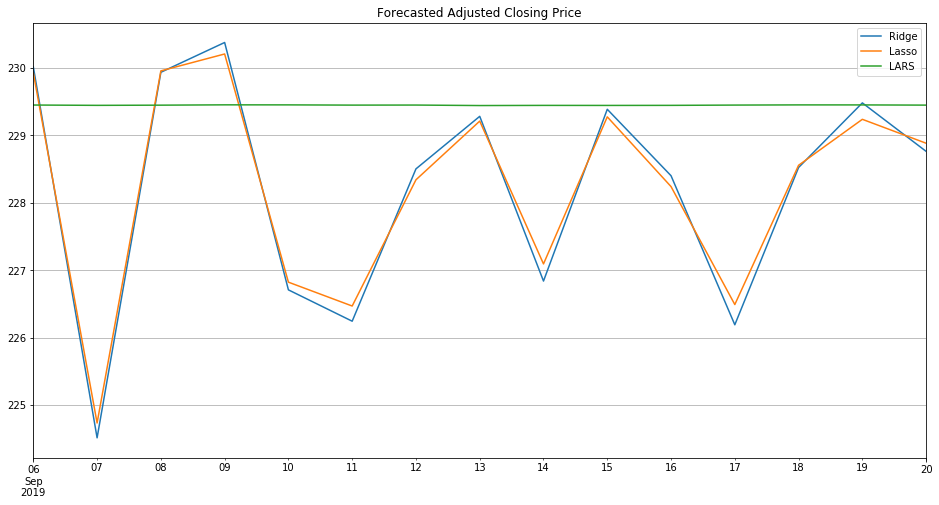

In [82]:
num_days = 15 # Let's try and forecase the next 10 days or two years

# ultimos 32 dias / close price
data_span = df['Adj Close'].values[-window_size:][None]


input_values = {"ridge": data_span, "lasso": data_span, "lars": data_span}
values = {"ridge": [], "lasso": [], "lars": []}
for i in range(num_days): # For each day...
    # Predict the next price given the previous N prices
    values["ridge"].append(ridge_model.predict(input_values["ridge"])[0])
    values["lasso"].append(lasso_model.predict(input_values["lasso"])[0])
    values["lars"].append(lars_model.predict(input_values["lars"])[0])

    # Dump the oldest price and put the newest price at the end
    for v in input_values:
        val = input_values[v]
        val = np.insert(val, -1, values[v][-1], axis=1)
        val = np.delete(val, 0, axis=1)
        input_values[v] = val.copy()

# Convert all to NumPy arrays
for v in input_values:
    values[v] = np.array(values[v])   
    
    
    #________________________________
    
from datetime import timedelta, datetime
last_date = datetime.strptime(df.index[-1], '%Y-%m-%d')
df_forecast = pd.DataFrame()
df_forecast["Ridge"] = values["ridge"]
df_forecast["Lasso"] = values["lasso"]
df_forecast["LARS"] = values["lars"]
df_forecast.index = pd.date_range(start=last_date, periods=num_days)
df_forecast.plot(label='TSLA', figsize=(16,8), title='Forecasted Adjusted Closing Price', grid=True)